In [1]:
from typing import Annotated, Literal, Sequence, TypedDict
from langchain import hub
from langchain_core.messages import BaseMessage,HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_core.pydantic_v1 import BaseModel,Field
from langgraph.graph.message import add_messages
from langgraph.prebuilt import tools_condition
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain.tools.retriever import create_retriever_tool
from langgraph.graph import END,StateGraph,START
from langgraph.prebuilt import ToolNode

/Users/srinidhikankanala/Desktop/Agentic AI/venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3577: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)
USER_AGENT environment variable not set, consider setting it to identify your requests.


In [2]:
from langchain_huggingface import HuggingFaceEmbeddings

In [3]:
embedding=HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

/Users/srinidhikankanala/Desktop/Agentic AI/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from langchain_groq import ChatGroq

In [5]:
llm=ChatGroq(model="Gemma2-9b-It")

In [6]:
urls=[
    "https://lilianweng.github.io/posts/2023-06-23-agent/",
    "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/",
]

In [7]:
docs = [WebBaseLoader(url).load() for url in urls]

In [8]:
docs

[[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final res

In [9]:
docs[0][0].metadata

{'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/',
 'title': "LLM Powered Autonomous Agents | Lil'Log",
 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\

In [10]:
docs[1][0].metadata

{'source': 'https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/',
 'title': "Prompt Engineering | Lil'Log",
 'description': 'Prompt Engineering, also known as In-Context Prompting, refers to methods for how to communicate with LLM to steer its behavior for desired outcomes without updating the model weights. It is an empirical science and the effect of prompt engineering methods can vary a lot among models, thus requiring heavy experimentation and heuristics.\nThis post only focuses on prompt engineering for autoregressive language models, so nothing with Cloze tests, image generation or multimodality models. At its core, the goal of prompt engineering is about alignment and model steerability. Check my previous post on controllable text generation.',
 'language': 'en'}

In [11]:
doc_list = [item for sublist in docs for item in sublist]

In [12]:
doc_list

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final resu

In [13]:
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=100,chunk_overlap=5)

In [14]:
doc_splits = text_splitter.split_documents(doc_list)

In [15]:
doc_splits

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final resu

In [16]:
vectorstore= Chroma.from_documents(
    documents=doc_splits,
    collection_name="rag-chrome",
    embedding=embedding,
)

In [17]:
retriever = vectorstore.as_retriever()

In [18]:
retriever_tool = create_retriever_tool(
    retriever,
    "retrieve_blog_posts",
    "Search and return information about Lilian Weng blog posts on LLM agents, prompt engineering, and adversarial attacks on LLMs.You are a specialized assistant. Use the 'retriever_tool' **only** when the query explicitly relates to LangChain blog data. For all other queries, respond directly without using any tool. For simple queries like 'hi', 'hello', or 'how are you', provide a normal response.",
)

In [19]:
tools = [retriever_tool]

In [20]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage],add_messages]

In [21]:
class grade(BaseModel):
    binary_score:str=Field(description="Relevant score 'yes' or 'no'")

In [22]:
def AI_Assistant(state:AgentState):
    print("---CALL AGENT---")
    messages = state['messages']
    llm_with_tool = llm.bind_tools(tools)
    response = llm_with_tool.invoke(messages)
    return {"messages":[response]}

In [23]:
retrieve = ToolNode([retriever_tool])

In [24]:
def generate(state:AgentState):
    print("---GENERATE---")
    messages = state["messages"]
    
    print(f"here is message from generate: {messages}")
    
    question = messages[0].content
    last_message = messages[-1]
    docs = last_message.content
    
    prompt = hub.pull("rlm/rag-prompt")
    
    rag_chain = prompt | llm | StrOutputParser()

    response = rag_chain.invoke({"context": docs, "question": question})
    print(f"this is my response:{response}")
    
    return {"messages": [response]}

In [40]:
prompt = hub.pull("rlm/rag-prompt")
prompt

/Users/srinidhikankanala/Desktop/Agentic AI/venv/lib/python3.11/site-packages/langsmith/client.py:256: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


ChatPromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': 'rlm', 'lc_hub_repo': 'rag-prompt', 'lc_hub_commit_hash': '50442af133e61576e74536c6556cefe1fac147cad032f4377b60c436e6cdcb6e'}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template="You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:"), additional_kwargs={})])

In [25]:
def grade_documents(state:AgentState)->Literal["Output_Generator", "Query_Rewriter"]:
    llm_with_structure_op=llm.with_structured_output(grade)
    
    prompt=PromptTemplate(
        template="""You are a grader deciding if a document is relevant to a user’s question.
                    Here is the document: {context}
                    Here is the user’s question: {question}
                    If the document talks about or contains information related to the user’s question, mark it as relevant. 
                    Give a 'yes' or 'no' answer to show if the document is relevant to the question.""",
                    input_variables=["context", "question"]
                    )
    chain = prompt | llm_with_structure_op
    
    messages = state["messages"]
    print(f"message from the grader: {messages}")
    last_message = messages[-1]
    question = messages[0].content
    docs = last_message.content
    scored_result = chain.invoke({"question": question, "context": docs})
    score = scored_result.binary_score

    if score == "yes":
        print("---DECISION: DOCS RELEVANT---")
        return "generate" #this should be a node name
    else:
        print("---DECISION: DOCS NOT RELEVANT---")
        return "rewriter" #this should be a node name

In [26]:
def rewriter(state:AgentState):
    print("---TRANSFORM QUERY---")
    messages = state["messages"]
    question = messages[0].content
    
    print(f"here is message from rewrite: {messages}")
    
    message = [HumanMessage(content=f"""Look at the input and try to reason about the underlying semantic intent or meaning. 
                    Here is the initial question: {question} 
                    Formulate an improved question: """)
       ]
    response = llm.invoke(message)
    return {"messages": [response]}

In [27]:
workflow=StateGraph(AgentState)

In [28]:
workflow.add_node("ai_assistant",AI_Assistant)
workflow.add_node("retriever",retrieve)
workflow.add_node("rewriter",rewriter)
workflow.add_node("generate",generate)

In [29]:
workflow.add_edge(START,"ai_assistant")
workflow.add_conditional_edges("ai_assistant",tools_condition,
                               {"tools":"retriever",
                                END:END,})


In [30]:
workflow.add_conditional_edges("retriever",
                               grade_documents,
                               {"rewriter": "rewriter", "generate": "generate",})

In [31]:
workflow.add_edge("generate",END)

In [32]:
workflow.add_edge("rewriter","ai_assistant")

In [33]:
app=workflow.compile()

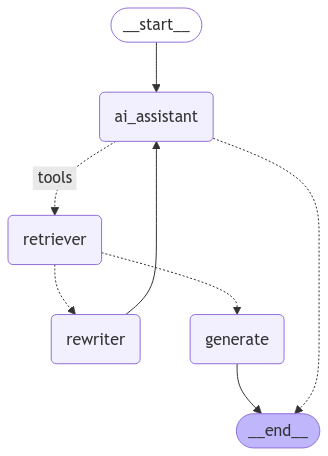

In [34]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [35]:
app.invoke({"messages":["What is a Autonomous Agent?"]})

---CALL AGENT---
message from the grader: [HumanMessage(content='What is a Autonomous Agent?', additional_kwargs={}, response_metadata={}, id='e945ae38-4fb1-4d4a-a544-c56710881606'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_4h2d', 'function': {'arguments': '{"query":"What is an autonomous agent?"}', 'name': 'retrieve_blog_posts'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 88, 'prompt_tokens': 1039, 'total_tokens': 1127, 'completion_time': 0.16, 'prompt_time': 0.033157558, 'queue_time': 0.022256031000000003, 'total_time': 0.193157558}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-f2069757-6c33-454a-9c5f-a67bb5b5b586-0', tool_calls=[{'name': 'retrieve_blog_posts', 'args': {'query': 'What is an autonomous agent?'}, 'id': 'call_4h2d', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1039, 'output_tokens': 88, 'total_tokens': 1127}), ToolMe

/Users/srinidhikankanala/Desktop/Agentic AI/venv/lib/python3.11/site-packages/langsmith/client.py:256: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


this is my response:An autonomous agent is a system that can plan and act independently to accomplish a goal.  It typically involves breaking down complex tasks into smaller steps and using memory to store and retrieve information.  LLM-powered autonomous agents use large language models to enhance their planning and decision-making capabilities. 



{'messages': [HumanMessage(content='What is a Autonomous Agent?', additional_kwargs={}, response_metadata={}, id='e945ae38-4fb1-4d4a-a544-c56710881606'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_4h2d', 'function': {'arguments': '{"query":"What is an autonomous agent?"}', 'name': 'retrieve_blog_posts'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 88, 'prompt_tokens': 1039, 'total_tokens': 1127, 'completion_time': 0.16, 'prompt_time': 0.033157558, 'queue_time': 0.022256031000000003, 'total_time': 0.193157558}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-f2069757-6c33-454a-9c5f-a67bb5b5b586-0', tool_calls=[{'name': 'retrieve_blog_posts', 'args': {'query': 'What is an autonomous agent?'}, 'id': 'call_4h2d', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1039, 'output_tokens': 88, 'total_tokens': 1127}),
  ToolMessage(content='LLM Powere

In [36]:
app.invoke({"messages":["What is a prompt engineering?"]})

---CALL AGENT---
message from the grader: [HumanMessage(content='What is a prompt engineering?', additional_kwargs={}, response_metadata={}, id='f580be18-d0b2-4479-acf5-fd16e8b6330d'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_98qz', 'function': {'arguments': '{"query":"What is prompt engineering?"}', 'name': 'retrieve_blog_posts'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 87, 'prompt_tokens': 1039, 'total_tokens': 1126, 'completion_time': 0.158181818, 'prompt_time': 0.032897199, 'queue_time': 0.021772211, 'total_time': 0.191079017}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-3a92eeda-002b-4aac-b521-09f7b01a790b-0', tool_calls=[{'name': 'retrieve_blog_posts', 'args': {'query': 'What is prompt engineering?'}, 'id': 'call_98qz', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1039, 'output_tokens': 87, 'total_tokens': 1126}), ToolMess

/Users/srinidhikankanala/Desktop/Agentic AI/venv/lib/python3.11/site-packages/langsmith/client.py:256: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


this is my response:Prompt engineering is the art and science of crafting effective inputs (prompts) for large language models (LLMs) to elicit desired responses. 

It involves techniques to guide the LLM's behavior without altering its core weights, relying on experimentation and iterative refinement. 
Prompt engineering is crucial for unlocking the full potential of LLMs in various applications.  




{'messages': [HumanMessage(content='What is a prompt engineering?', additional_kwargs={}, response_metadata={}, id='f580be18-d0b2-4479-acf5-fd16e8b6330d'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_98qz', 'function': {'arguments': '{"query":"What is prompt engineering?"}', 'name': 'retrieve_blog_posts'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 87, 'prompt_tokens': 1039, 'total_tokens': 1126, 'completion_time': 0.158181818, 'prompt_time': 0.032897199, 'queue_time': 0.021772211, 'total_time': 0.191079017}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-3a92eeda-002b-4aac-b521-09f7b01a790b-0', tool_calls=[{'name': 'retrieve_blog_posts', 'args': {'query': 'What is prompt engineering?'}, 'id': 'call_98qz', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1039, 'output_tokens': 87, 'total_tokens': 1126}),
  ToolMessage(content='Prompt Engin

In [37]:
app.invoke({"messages":["who is a current prime minister of india?"]})

---CALL AGENT---
message from the grader: [HumanMessage(content='who is a current prime minister of india?', additional_kwargs={}, response_metadata={}, id='212fb883-2a77-4d2d-ac11-35bdc4373f74'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_1m69', 'function': {'arguments': '{"query":"who is the current prime minister of india"}', 'name': 'retrieve_blog_posts'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 91, 'prompt_tokens': 1042, 'total_tokens': 1133, 'completion_time': 0.165454545, 'prompt_time': 0.033241078, 'queue_time': 0.022574420999999997, 'total_time': 0.198695623}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-b735358b-4b4b-474e-a185-c3252c851997-0', tool_calls=[{'name': 'retrieve_blog_posts', 'args': {'query': 'who is the current prime minister of india'}, 'id': 'call_1m69', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1042, 'o

{'messages': [HumanMessage(content='who is a current prime minister of india?', additional_kwargs={}, response_metadata={}, id='212fb883-2a77-4d2d-ac11-35bdc4373f74'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_1m69', 'function': {'arguments': '{"query":"who is the current prime minister of india"}', 'name': 'retrieve_blog_posts'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 91, 'prompt_tokens': 1042, 'total_tokens': 1133, 'completion_time': 0.165454545, 'prompt_time': 0.033241078, 'queue_time': 0.022574420999999997, 'total_time': 0.198695623}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-b735358b-4b4b-474e-a185-c3252c851997-0', tool_calls=[{'name': 'retrieve_blog_posts', 'args': {'query': 'who is the current prime minister of india'}, 'id': 'call_1m69', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1042, 'output_tokens': 91, 'total_t

In [38]:
app.invoke({"messages":["what is solar eclips?"]})

---CALL AGENT---
message from the grader: [HumanMessage(content='what is solar eclips?', additional_kwargs={}, response_metadata={}, id='7399751c-316e-4cbb-8930-7a7edf17bfa0'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_7nht', 'function': {'arguments': '{"query":"what is a solar eclipse"}', 'name': 'retrieve_blog_posts'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 88, 'prompt_tokens': 1038, 'total_tokens': 1126, 'completion_time': 0.16, 'prompt_time': 0.033092439, 'queue_time': 0.021399627999999997, 'total_time': 0.193092439}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-31f2f177-9f10-4896-84ea-22a8ca2a111f-0', tool_calls=[{'name': 'retrieve_blog_posts', 'args': {'query': 'what is a solar eclipse'}, 'id': 'call_7nht', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1038, 'output_tokens': 88, 'total_tokens': 1126}), ToolMessage(content='l

{'messages': [HumanMessage(content='what is solar eclips?', additional_kwargs={}, response_metadata={}, id='7399751c-316e-4cbb-8930-7a7edf17bfa0'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_7nht', 'function': {'arguments': '{"query":"what is a solar eclipse"}', 'name': 'retrieve_blog_posts'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 88, 'prompt_tokens': 1038, 'total_tokens': 1126, 'completion_time': 0.16, 'prompt_time': 0.033092439, 'queue_time': 0.021399627999999997, 'total_time': 0.193092439}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-31f2f177-9f10-4896-84ea-22a8ca2a111f-0', tool_calls=[{'name': 'retrieve_blog_posts', 'args': {'query': 'what is a solar eclipse'}, 'id': 'call_7nht', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1038, 'output_tokens': 88, 'total_tokens': 1126}),
  ToolMessage(content='learning models) or symbol